# 实现Kmeans算法

In [2]:
# 导入所需库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 读取数据集

In [3]:
# 导入数据集
dataset = pd.read_csv('iris.csv')

## kmeans算法实现

150


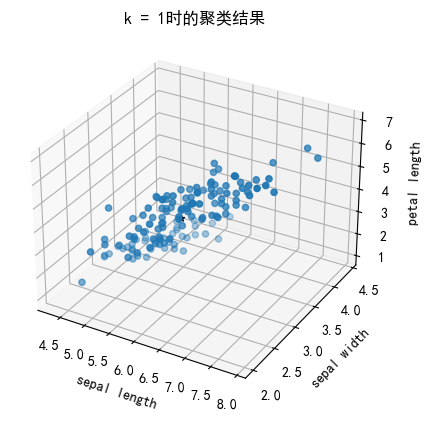

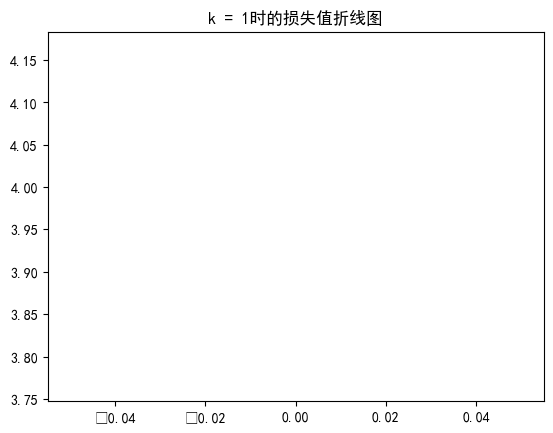

150


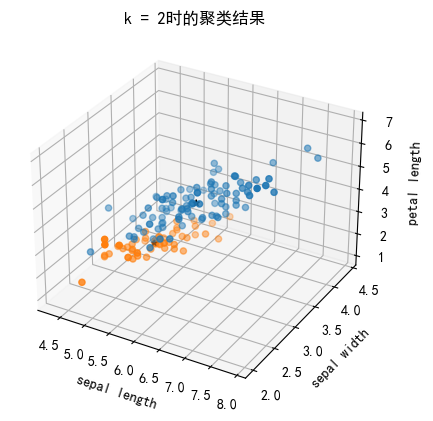

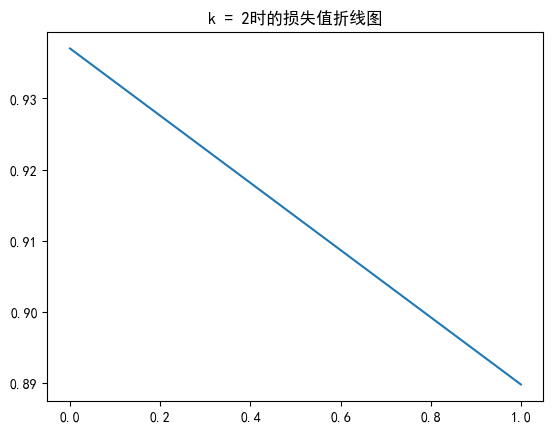

150


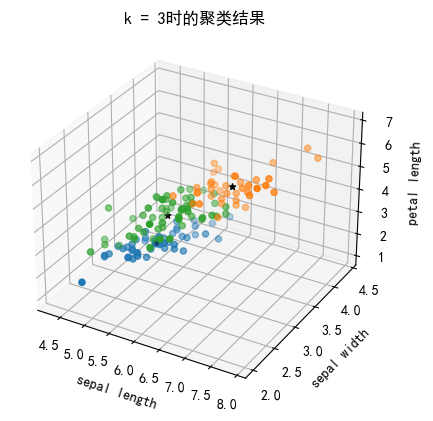

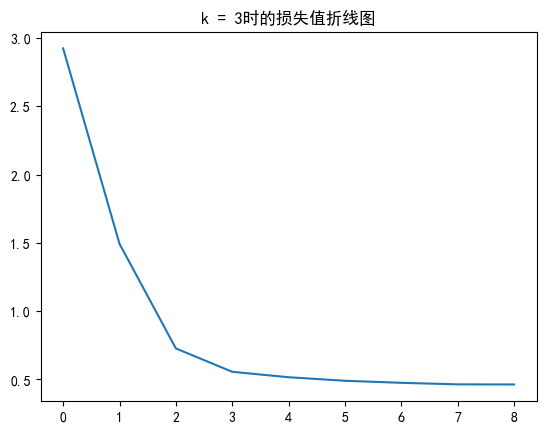

150


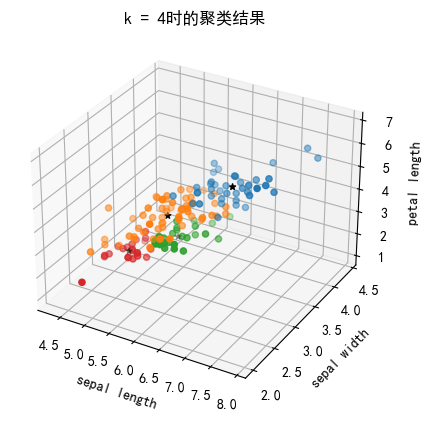

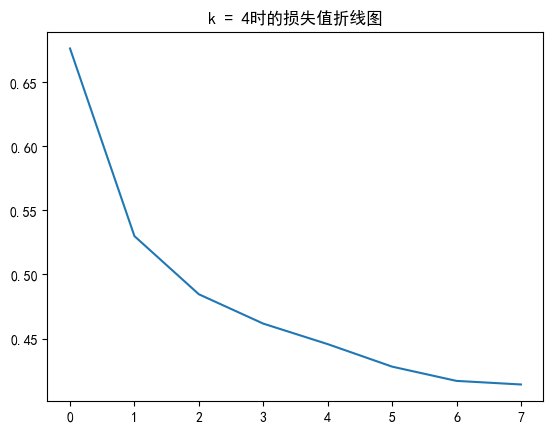

150


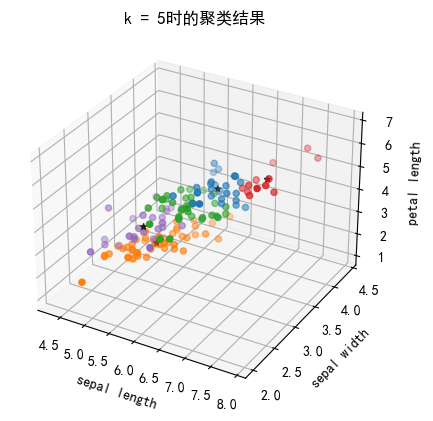

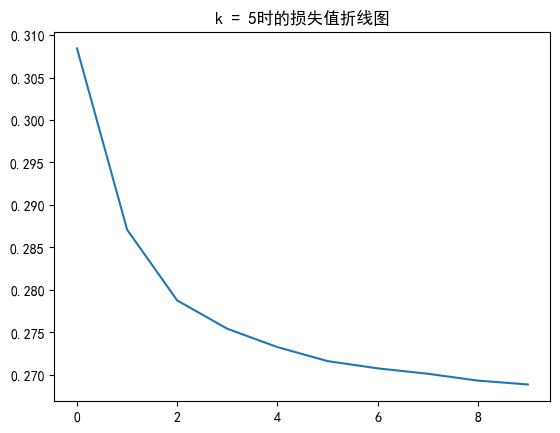

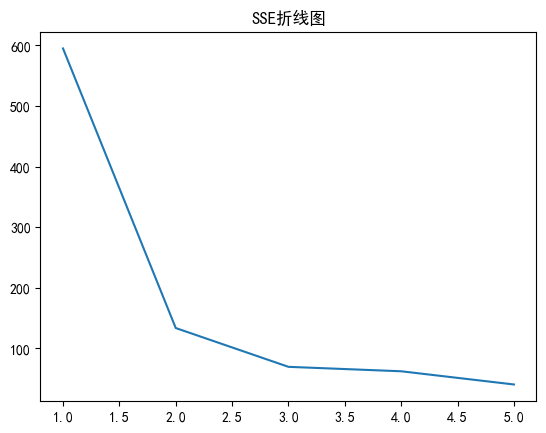

In [6]:
# 实现kmeans算法
class KMeans:
    # 初始化
    def __init__(self, k=3, max_iters=300):
        self.k = k
        self.max_iters = max_iters
        # 质心
        self.centroids = None
        # 标签
        self.labels = None
        # 分类
        self.clusters = None
        # 损失值
        self.loss_value = []
        # SSE
        self.SSE = 0
    
    def _init_centroids(self, X):
        # 随机初始化质心
        return X[np.random.choice(X.shape[0], self.k, replace=False)]

    def _get_labels(self, X):
        # 计算距离
        distances = np.sqrt(np.sum((X - self.centroids[:, np.newaxis])**2, axis=2))
        # 返回最近的质心索引
        return np.argmin(distances, axis=0)

    def _get_centroids(self, X):
        # 更新质心
        centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            centroids[i] = np.mean(X[self.labels == i], axis=0)
        return centroids

    def _get_clusters(self, X):
        # 更新SSE
        clusters = [[] for _ in range(self.k)]
        for i in range(self.k):
            clusters[i] = X[self.labels == i]
        return clusters

    def plot(self):
        # 可视化
        ax = plt.axes(projection='3d')
        for i in range(self.k):
            ax.scatter3D(self.clusters[i][:, 0], self.clusters[i][:, 1], self.clusters[i][:, 2], label='cluster {}'.format(i))
        ax.scatter3D(self.centroids[:, 0], self.centroids[:, 1], self.centroids[:, 2], marker='*', c='black', label='centroids')
        ax.set_xlabel('sepal length')
        ax.set_ylabel('sepal width')
        ax.set_zlabel('petal length')

    # 训练
    def fit(self, X):
        # 初始化质心
        self.centroids = self._init_centroids(X)
        # 初始化标签
        self.labels = np.zeros((X.shape[0], 1))
        # 初始化分类
        self.clusters = [[] for _ in range(self.k)]
        # 迭代
        for _ in range(self.max_iters):
            # 更新标签
            self.labels = self._get_labels(X)
            # 更新质心
            new_centroids = self._get_centroids(X)
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = self._get_centroids(X)
            # 更新SSE
            self.clusters = self._get_clusters(X)
            # 将损失值加入列表
            self.loss_value.append([_, self.loss(X=X)])
            
        # 计算SSE
        for i in range(self.k):
            self.SSE += np.sum((self.clusters[i] - self.centroids[i])**2)
        # 设置字体为黑体
        plt.rcParams['font.sans-serif'] = ['SimHei']
        # 设置标题为k的值
        self.plot()
        plt.title('k = {}时的聚类结果'.format(self.k))
        # 展示损失值的折线图
        plt.figure()
        plt.plot([i[0] for i in self.loss_value], [i[1] for i in self.loss_value])
        plt.title('k = {}时的损失值折线图'.format(self.k))

    # 预测
    def predict(self, X):
        return self._get_labels(X)
    
    # 损失值
    def loss(self, X):
        loss = 0
        # 代价函数为畸变函数
        for i in range(X.shape[0]):
            # 找到最近的质心
            n_centroid = self.centroids[self.labels[i]]
            # 计算距离
            loss += np.sum((X[i] - n_centroid)**2)
        loss = loss / X.shape[0]
        return loss

# 主函数
if __name__ == '__main__':
    SSE_list = []

    k = 1
    kmeans = KMeans(k=k, max_iters=50)
    kmeans.fit(dataset.iloc[:, 1:4].values)
    plt.show()
    SSE_list.append([k, kmeans.SSE])

    # 实例化
    k = 2
    kmeans = KMeans(k=k, max_iters=50)
    kmeans.fit(dataset.iloc[:, 1:4].values)
    plt.show()
    SSE_list.append([k, kmeans.SSE])

    k = 3
    kmeans = KMeans(k=k, max_iters=50)
    kmeans.fit(dataset.iloc[:, 1:4].values)
    plt.show()
    SSE_list.append([k, kmeans.SSE])

    k = 4
    kmeans = KMeans(k=k, max_iters=50)
    kmeans.fit(dataset.iloc[:, 1:4].values)
    plt.show()
    SSE_list.append([k, kmeans.SSE])

    k = 5
    kmeans = KMeans(k=k, max_iters=50)
    kmeans.fit(dataset.iloc[:, 1:4].values)
    plt.show()
    SSE_list.append([k, kmeans.SSE])

    for i in SSE_list:
        print('k = {}, SSE = {}'.format(i[0], i[1]))

    # 绘制SSE的折线图
    plt.figure()
    plt.plot([i[0] for i in SSE_list], [i[1] for i in SSE_list])
    plt.title('SSE折线图')
    # 保存图片
    plt.savefig('SSE.png')
    plt.show()


